In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:

df=pd.read_csv("../data/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
#last,first e göre aggregation yapılabilir

In [64]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [65]:
columns=list(df.columns)
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [66]:
df=df[columns].replace("?",None)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [67]:
print(pd.__version__)

1.4.4


In [68]:
print(df.isnull().sum())
print(df.isnull().mean())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64
age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [70]:
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [71]:
for col in cat_cols:
    print(df[col].value_counts())
    print("###########################################################################")



Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
###########################################################################
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
###########################################################################
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marit

In [72]:
np.nan==np.nan

False

In [73]:
df[df["occupation"].isnull()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,None,172175,Doctorate,16,Never-married,None,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,None,135285,HS-grad,9,Married-civ-spouse,None,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,None,100820,HS-grad,9,Married-civ-spouse,None,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,None,320084,Bachelors,13,Married-civ-spouse,None,Wife,White,Female,0,0,55,United-States,>50K
32534,30,None,33811,Bachelors,13,Never-married,None,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,None,287372,Doctorate,16,Married-civ-spouse,None,Husband,White,Male,0,0,10,United-States,>50K
32543,41,None,202822,HS-grad,9,Separated,None,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [74]:
df[df["occupation"].isnull()].isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country      27
income               0
dtype: int64

In [75]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [76]:
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


<Axes: >

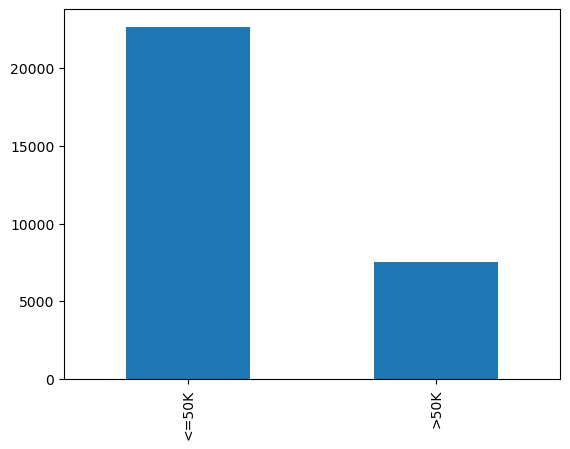

In [77]:
x=df["income"].value_counts()
x.plot(kind="bar")



In [78]:
df["income"]

1        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 30162, dtype: object

<Axes: xlabel='income', ylabel='count'>

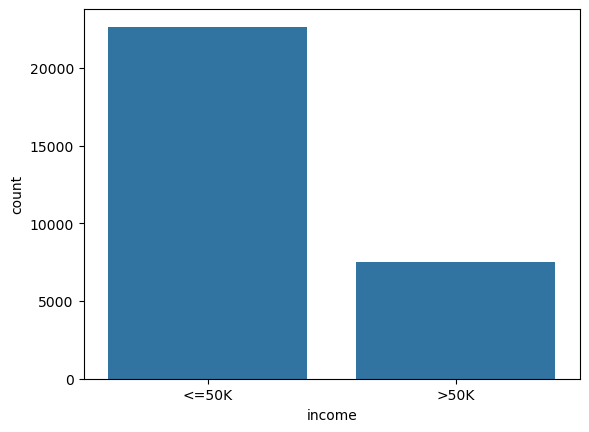

In [79]:
sns.countplot(x=df["income"])

In [80]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [81]:
df.groupby("income").agg({"hours.per.week":"mean"})

,hours.per.week
income,
<=50K,39.348592
>50K,45.706580


In [82]:
df["hours.per.week"].value_counts().head(30)

40    14251
50     2718
45     1753
60     1405
35     1184
20     1054
30      989
55      672
25      574
48      494
38      456
15      346
70      276
65      241
32      238
10      222
24      217
42      213
44      209
36      202
16      180
43      146
37      145
12      137
52      135
80      120
8       102
56       90
46       80
99       78
Name: hours.per.week, dtype: int64

In [83]:
flt_df= df[df["hours.per.week"]==40]

In [84]:
flt_df.groupby(["sex","income"]).agg({"income":"count"})

income
sex    income        
Female <=50K     4087
       >50K       471
Male   <=50K     7054
       >50K      2639

In [85]:
cat_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

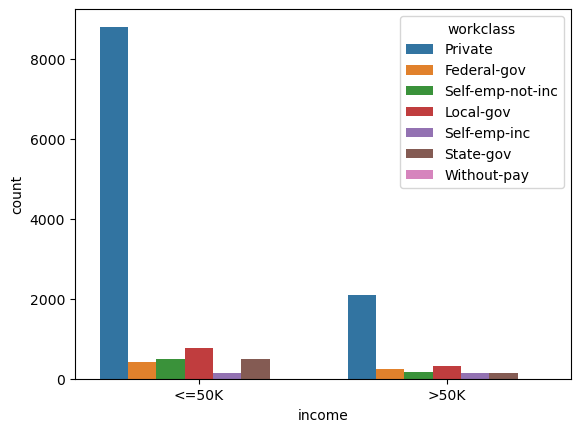

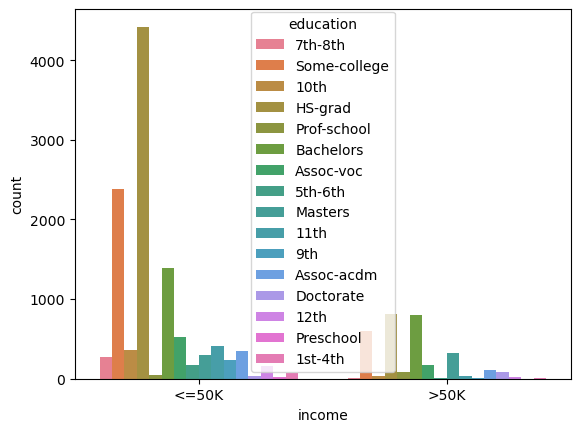

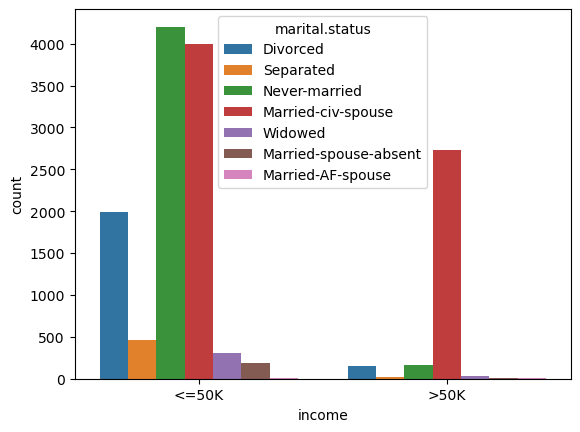

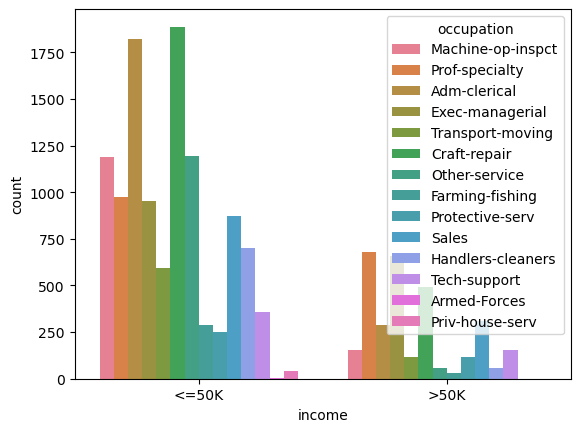

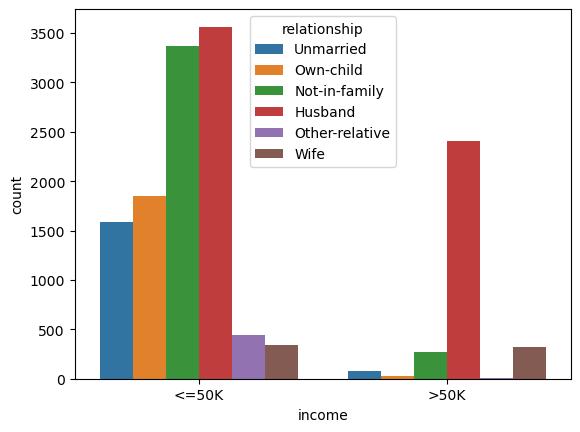

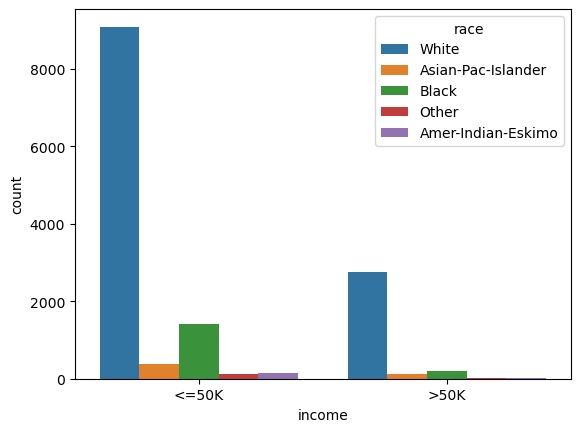

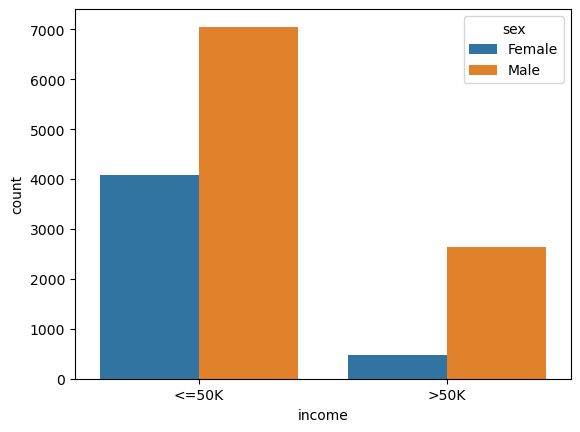

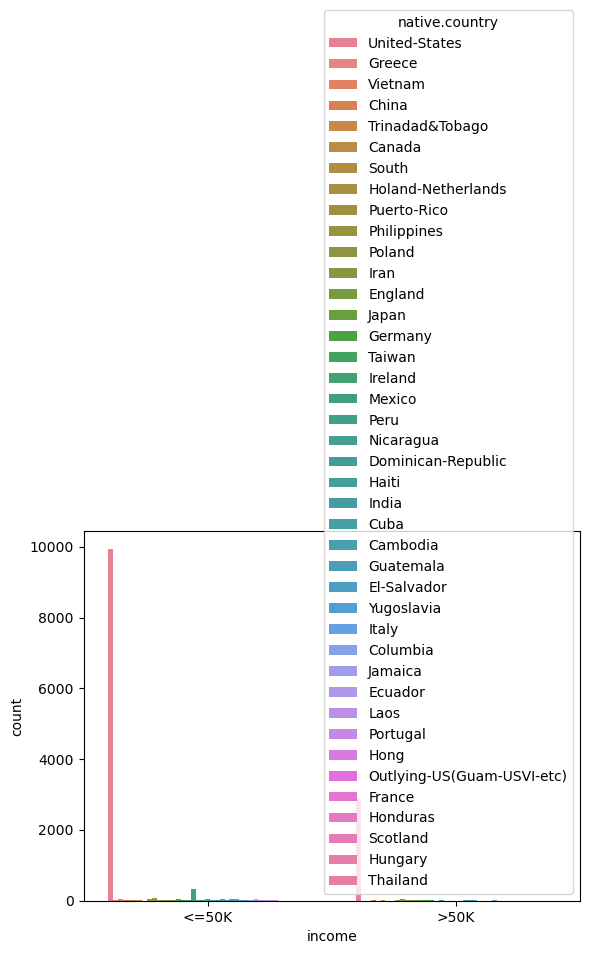

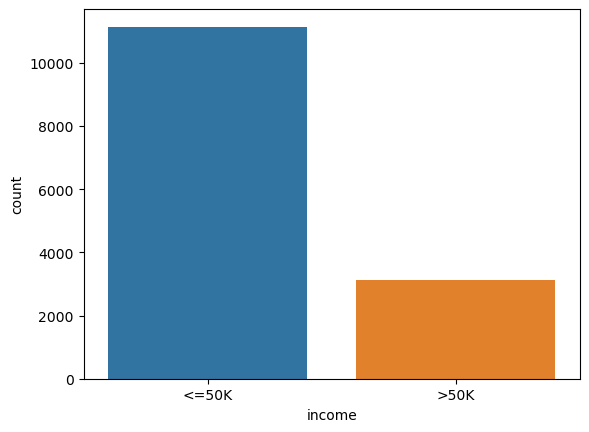

In [86]:
for cat in cat_cols:
    sns.countplot(x=flt_df["income"],hue=flt_df[cat])
    plt.show()
    print()

In [87]:
flt_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
15,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K


In [88]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [90]:
int_col=df.select_dtypes(int)

In [91]:
int_col.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.008957
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.335286
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.221196
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.150053
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.229480
income,0.241998,-0.008957,0.335286,0.221196,0.150053,0.229480,1.000000


In [92]:
df["income"]=df["income"].astype(bool)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


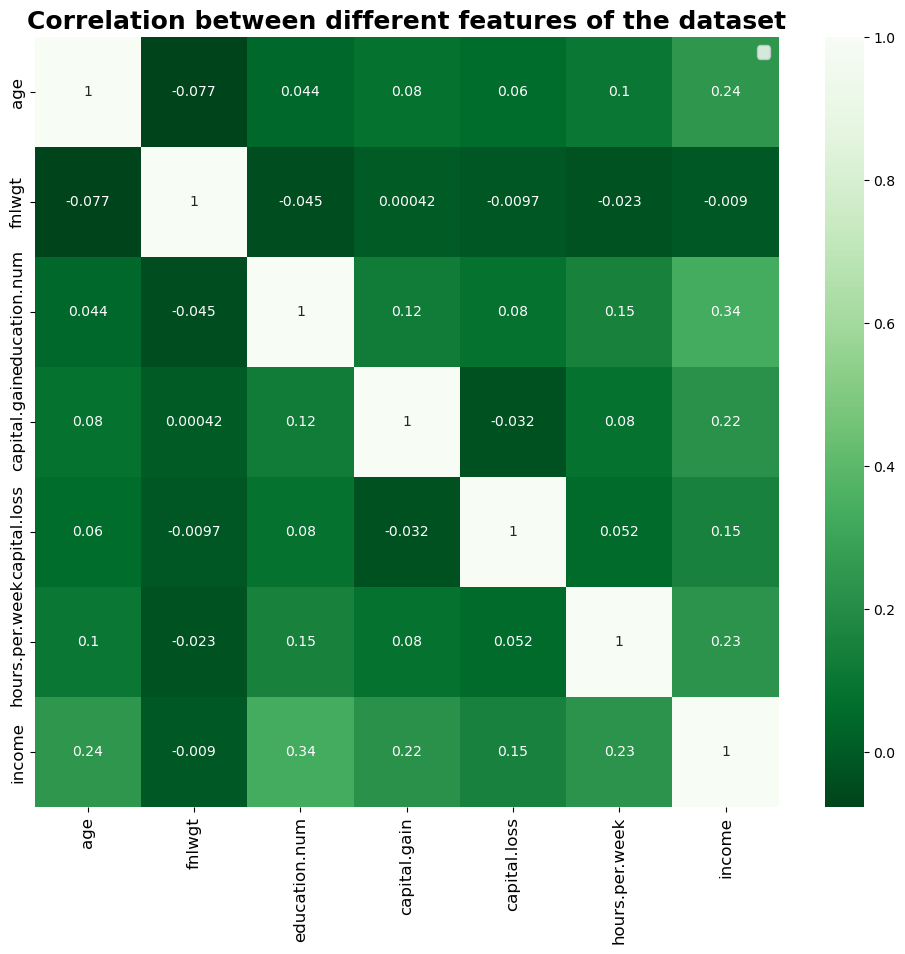

In [93]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(int_col.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

In [94]:
%%time
import os
print(os.listdir("../"))

['.git', '.gitignore', '.idea', '.ipynb_checkpoints', 'data', 'debug_session', 'dvd.ipynb', 'eurotech_ds', 'HW01_Excel.xlsx', 'kaggle', 'notebooks', 'No_show1.ipynb', 'NYC Taxi Data SQL Questions (2).docx', 'nyc_sample_data_for_sql_oct_2015.csv', 'nyc_sample_data_for_sql_sep_2015.csv', 'nyc_taxi_query_notebook.ipynb', 'Sales.ipynb', 'sincap1.ipynb', 'sql', 'Untitled.ipynb']
Wall time: 0 ns


In [95]:
X = df.drop(['income'], axis=1)

y = df['income']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [97]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [98]:
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
15952,21,5,173324,15,10,4,7,3,2,1,0,0,20,38
13543,38,1,116608,11,9,2,0,5,4,0,0,0,35,38
23197,20,2,219262,1,7,4,2,1,4,1,0,0,60,38
9269,20,2,107658,15,10,4,12,1,4,0,0,0,10,38
8821,28,2,60772,9,13,4,3,3,4,0,0,0,45,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,19,2,100009,15,10,4,11,3,4,0,0,0,15,38
21177,63,2,219540,11,9,0,2,1,4,0,0,0,40,38
10625,25,5,194954,15,10,2,7,5,4,0,0,0,15,38
11649,29,2,207064,11,9,2,6,0,4,1,0,0,40,38


In [99]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States


In [100]:
X["capital.loss"]

1        4356
3        3900
4        3900
5        3770
6        3770
         ... 
32556       0
32557       0
32558       0
32559       0
32560       0
Name: capital.loss, Length: 30162, dtype: int64

In [102]:
#(x - mean) / std

In [103]:
((X["capital.loss"] - X["capital.loss"].mean()) / X["capital.loss"].std())

1        10.555639
3         9.427759
4         9.427759
5         9.106214
6         9.106214
           ...    
32556    -0.218582
32557    -0.218582
32558    -0.218582
32559    -0.218582
32560    -0.218582
Name: capital.loss, Length: 30162, dtype: float64

In [104]:
X["capital.loss"].mean()

88.37248856176646

In [105]:
X["capital.loss"].std()

404.29837048617463

C:\Users\NG\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

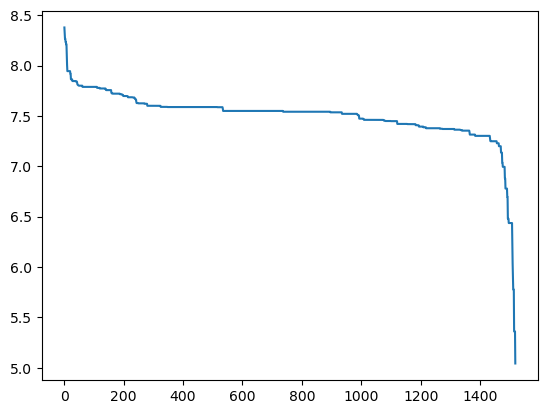

In [106]:
np.log(X["capital.loss"]).plot()

In [107]:
0.00000000000000613

6.13e-15

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sdt = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test_sdt = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [109]:
X_train_sdt

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,-1.330142,2.910809,-0.158867,1.227394,-0.055853,0.947747,0.251034,0.988818,-2.021441,0.688821,-0.147806,-0.218084,-1.742476,0.264146
1,-0.035023,-1.253435,-0.693994,0.171674,-0.449325,-0.390790,-1.485069,2.236989,0.384279,-1.451756,-0.147806,-0.218084,-0.492686,0.264146
2,-1.406325,-0.212374,0.274567,-2.467627,-1.236267,0.947747,-0.989040,-0.259353,0.384279,0.688821,-0.147806,-0.218084,1.590297,0.264146
3,-1.406325,-0.212374,-0.778439,1.227394,-0.055853,0.947747,1.491107,-0.259353,0.384279,-1.451756,-0.147806,-0.218084,-2.575670,0.264146
4,-0.796857,-0.212374,-1.220817,-0.356186,1.124560,0.947747,-0.741025,0.988818,0.384279,-1.451756,-0.147806,-0.218084,0.340507,0.264146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,-1.482509,-0.212374,-0.850608,1.227394,-0.055853,0.947747,1.243092,0.988818,0.384279,-1.451756,-0.147806,-0.218084,-2.159073,0.264146
21109,1.869564,-0.212374,0.277190,0.171674,-0.449325,-1.729327,-0.989040,-0.259353,0.384279,-1.451756,-0.147806,-0.218084,-0.076090,0.264146
21110,-1.025408,2.910809,0.045216,1.227394,-0.055853,-0.390790,0.251034,2.236989,0.384279,-1.451756,-0.147806,-0.218084,-2.159073,0.264146
21111,-0.720674,-0.212374,0.159476,0.171674,-0.449325,-0.390790,0.003019,-0.883439,0.384279,0.688821,-0.147806,-0.218084,-0.076090,0.264146


In [110]:
X_train["workclass"].mean()

2.2039975370624734

In [111]:
X_train["workclass"].std()

0.9605811337055369

In [114]:
X_train["workclass"].mean()/X_train["workclass"].std()

2.2944418328937344

In [113]:
df["native.country"].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [ ]:
environment variables
# database
    # server name ui
    # password 1234
    # id Hasan

In [ ]:
with open('file.txt', 'r') as file:
    lines = file.readlines()
    print(lines)
ffff